In [23]:
import pandas as pd
pubmed = pd.read_csv('data/pubmed.csv') # make sure pubmed has a column named 'category'
pubmed.head()
pubmed.columns

Index(['pubmed_id', 'title', 'keywords', 'journal', 'abstract', 'methods',
       'results', 'conclusions', 'copyrights', 'doi', 'publication_date',
       'authors'],
      dtype='object')

In [ ]:
# THE FOLLOWING IS JUST FOR TEST
# import pandas as pd
# import random

# # List of disease categories
# diseases = [
#     "pancreatic cancer",
#     "chagas disease",
#     "endometriosis",
#     "drug resistant tuberculosis",
#     "duchenne muscular dystrophy"
# ]

# # Assign a random category from diseases list to each row
# pubmed['category'] = pubmed.apply(lambda x: random.choice(diseases), axis=1)

# # Display the updated dataframe
# print(pubmed)


     pubmed_id                                              title  \
0     40050950  Efficacy of two doses of intra-articular ozone...   
1     40050948  Ovarian stimulation by promoting basal follicu...   
2     40050941  Physical activity and lung cancer screening (P...   
3     40050934  GABA and GLP-1 receptor agonist combination th...   
4     40050933                Harnessing myeloid cells in cancer.   
..         ...                                                ...   
495   40032546  Definition, prevalence, and economic impacts o...   
496   40032516  Assessing brodalumab in the treatment of prima...   
497   40032405  Somatic acupressure for the management of the ...   
498   40032403  Exploring risk factors for comorbid depression...   
499   40032398  Naturalistic trial of nudging patients and cli...   

                                              keywords  \
0    Double-blind randomized controlled trial, Func...   
1    Advanced glycation end-products, Assisted repr... 

In [25]:
import pandas as pd


# Convert publication_date to datetime
pubmed['publication_date'] = pd.to_datetime(pubmed['publication_date'])

### 1) Number of samples per category
category_counts = pubmed['category'].value_counts()
print("Number of samples per category:")
print(category_counts)
print("\n")

### 2) Top 10 journal venues per category
top_journals = pubmed.groupby('category')['journal'].value_counts().groupby(level=0).head(10)
print("Top 10 journal venues per category:")
print(top_journals)
print("\n")

### 3) Earliest, latest publication date, and elapsed days per category
date_range = pubmed.groupby('category')['publication_date'].agg(['min', 'max'])
date_range['elapsed_days'] = (date_range['max'] - date_range['min']).dt.days  # Compute elapsed days
print("Earliest, latest publication date, and elapsed days per category:")
print(date_range)


Number of samples per category:
category
drug resistant tuberculosis    117
endometriosis                  101
pancreatic cancer               98
chagas disease                  97
duchenne muscular dystrophy     87
Name: count, dtype: int64


Top 10 journal venues per category:
category                     journal                                                                                                                                                                   
chagas disease               BMJ open                                                                                                                                                                      4
                             Journal of sports science & medicine                                                                                                                                          3
                             Neuropsychiatric disease and treatment                                           

/tmp/ipykernel_42605/4216411280.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=pubmed['category'], palette="coolwarm", order=pubmed['category'].value_counts().index)


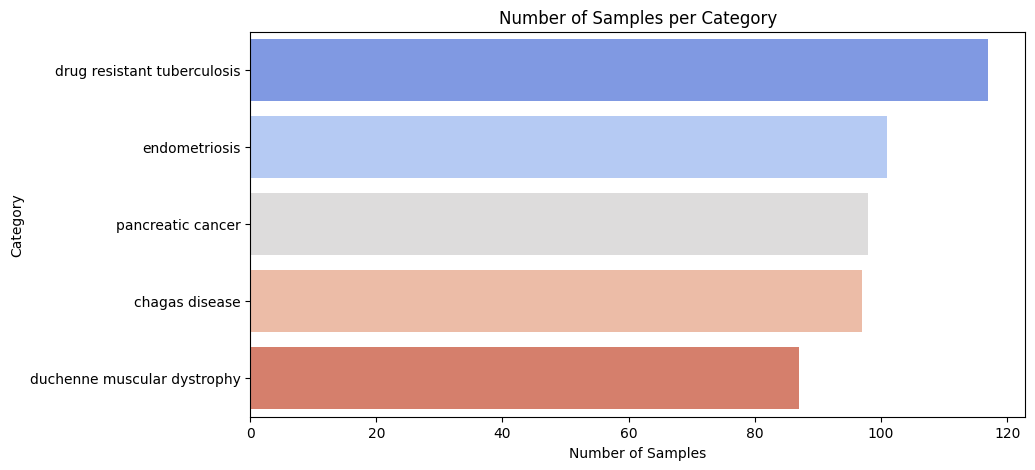

/tmp/ipykernel_42605/4216411280.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=category_data.index, x=category_data.values, palette="muted")


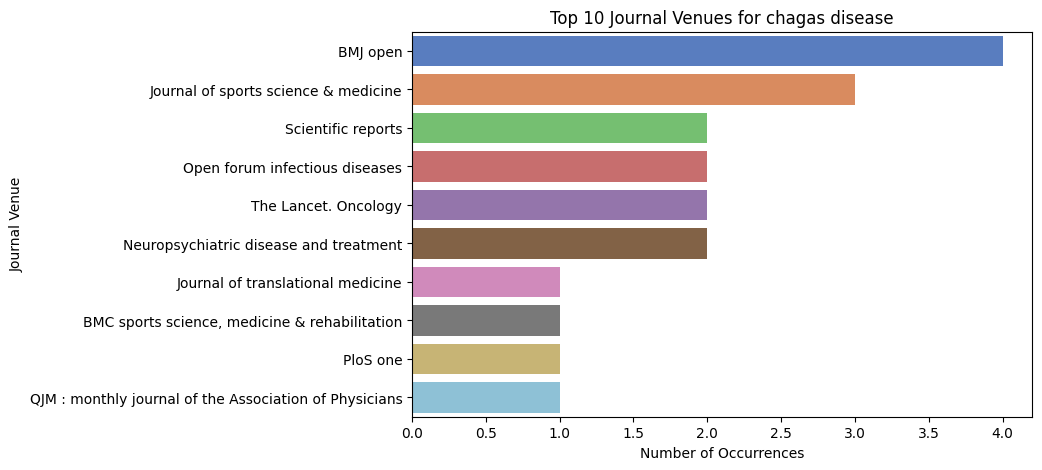

/tmp/ipykernel_42605/4216411280.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=category_data.index, x=category_data.values, palette="muted")


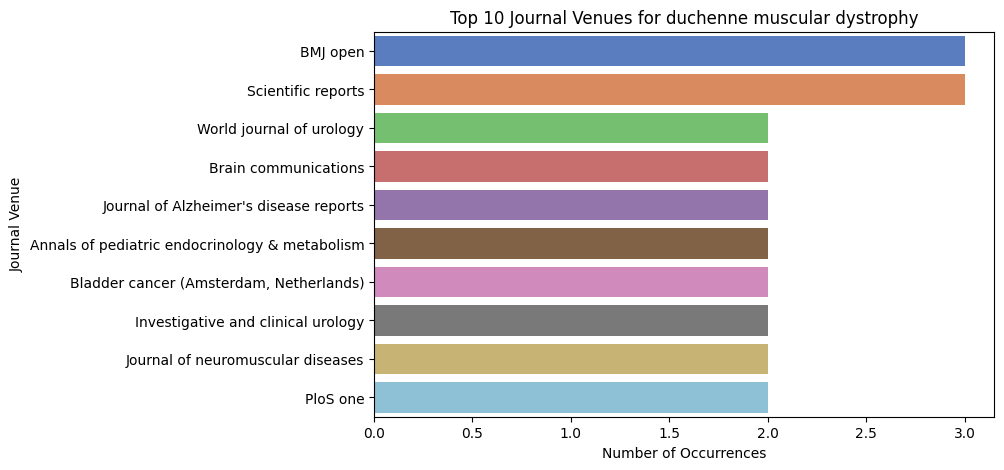

/tmp/ipykernel_42605/4216411280.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=category_data.index, x=category_data.values, palette="muted")


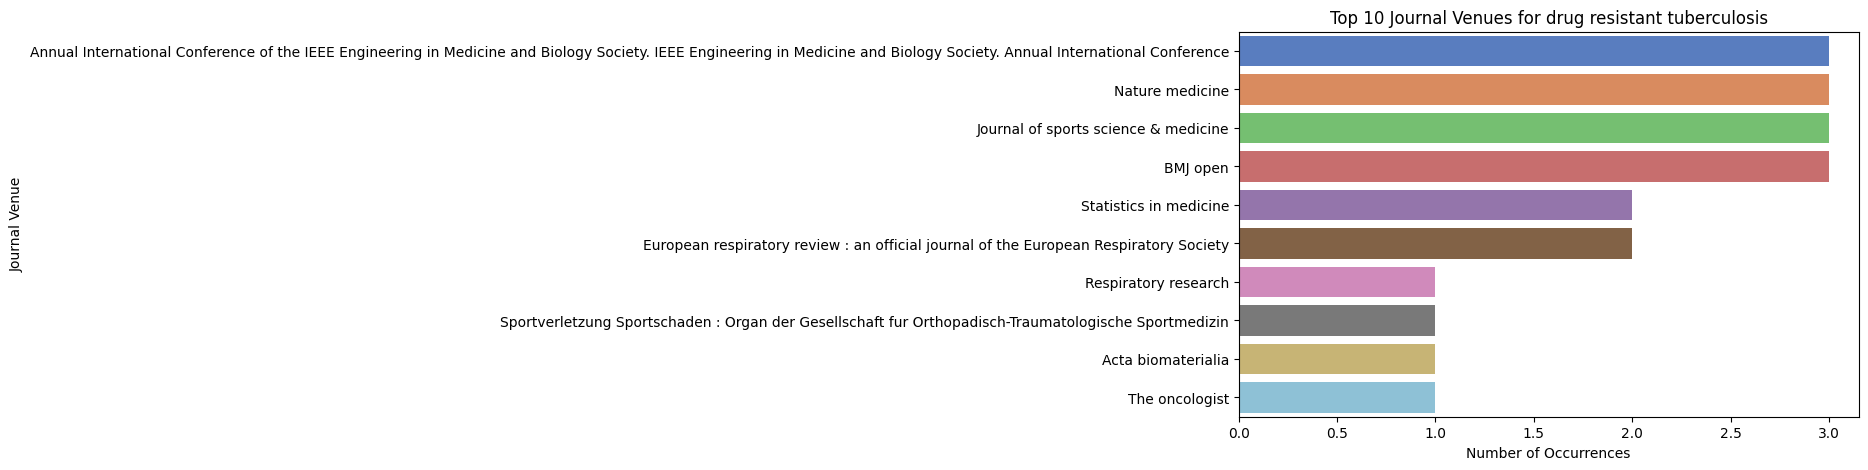

/tmp/ipykernel_42605/4216411280.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=category_data.index, x=category_data.values, palette="muted")


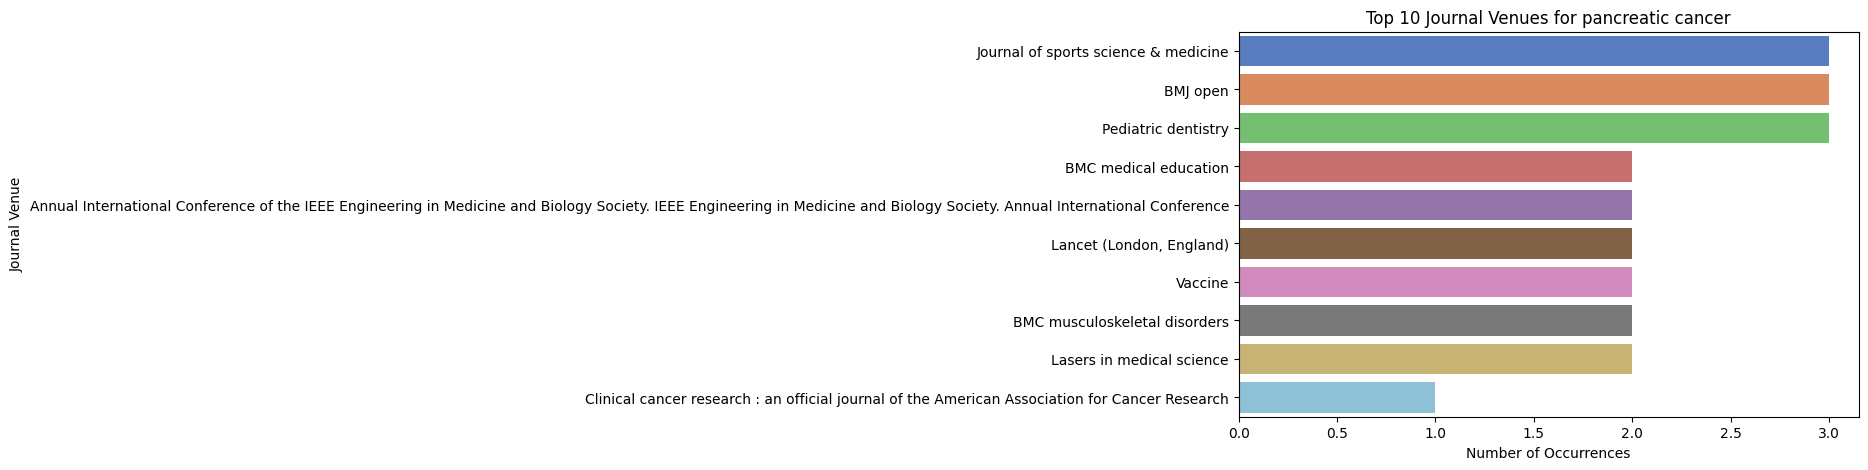

/tmp/ipykernel_42605/4216411280.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=category_data.index, x=category_data.values, palette="muted")


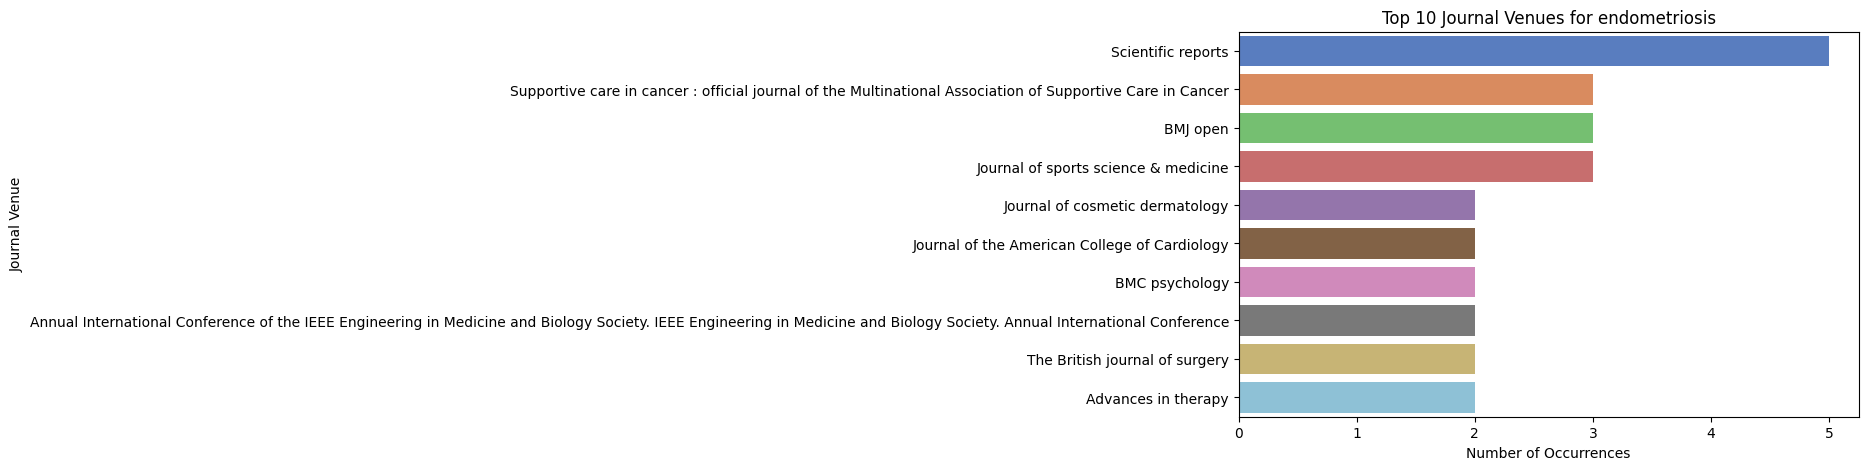

/tmp/ipykernel_42605/4216411280.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=date_range, y="category", x="elapsed_days", palette="viridis")


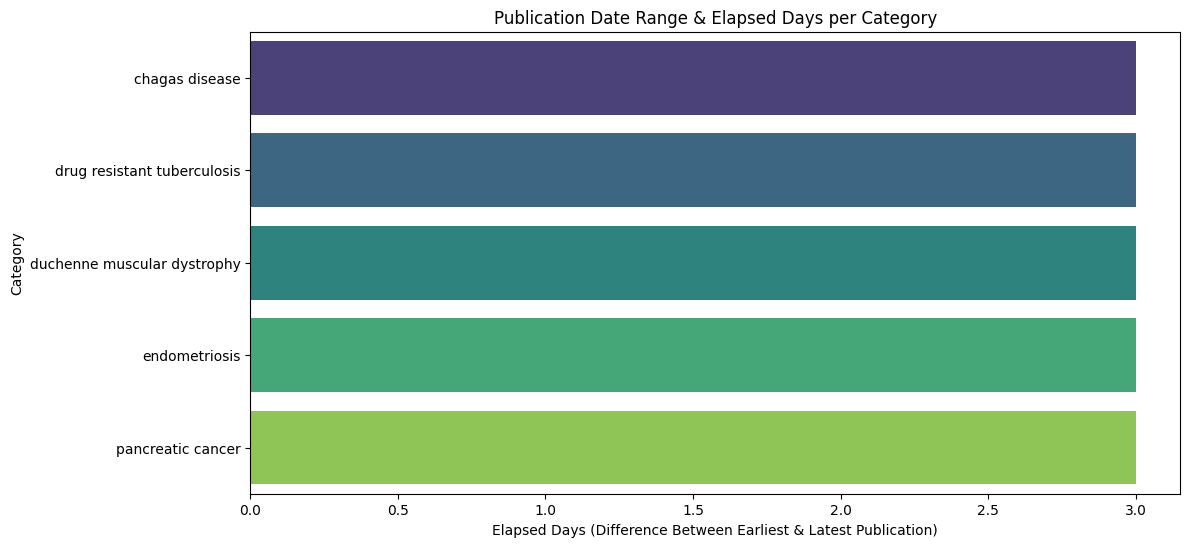

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Convert publication_date to datetime
pubmed['publication_date'] = pd.to_datetime(pubmed['publication_date'])

# 1) Number of Samples per Category
plt.figure(figsize=(10, 5))
sns.countplot(y=pubmed['category'], palette="coolwarm", order=pubmed['category'].value_counts().index)
plt.xlabel("Number of Samples")
plt.ylabel("Category")
plt.title("Number of Samples per Category")
plt.show()

# 2) Top 10 Journal Venues per Category
# top_journals = pubmed.groupby('category')['journal'].value_counts().groupby(level=0).head(10).reset_index(name='count')

# plt.figure(figsize=(12, 6))
# sns.barplot(data=top_journals, y='journal', x='count', hue='category', palette="muted")
# plt.xlabel("Number of Occurrences")
# plt.ylabel("Journal Venue")
# plt.title("Top 10 Journal Venues per Category")
# plt.legend(title="Category", bbox_to_anchor=(1, 1))
# plt.show()

categories = pubmed['category'].unique()

for category in categories:
    plt.figure(figsize=(8, 5))
    category_data = pubmed[pubmed['category'] == category]['journal'].value_counts().head(10)
    
    sns.barplot(y=category_data.index, x=category_data.values, palette="muted")
    plt.xlabel("Number of Occurrences")
    plt.ylabel("Journal Venue")
    plt.title(f"Top 10 Journal Venues for {category}")
    plt.show()

# 3) Earliest, Latest Publication Date, and Elapsed Days per Category
date_range = pubmed.groupby('category')['publication_date'].agg(['min', 'max']).reset_index()
date_range['elapsed_days'] = (date_range['max'] - date_range['min']).dt.days

plt.figure(figsize=(12, 6))
sns.barplot(data=date_range, y="category", x="elapsed_days", palette="viridis")
plt.xlabel("Elapsed Days (Difference Between Earliest & Latest Publication)")
plt.ylabel("Category")
plt.title("Publication Date Range & Elapsed Days per Category")
plt.show()
